In [1]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('Data/Miami_Accidents(Clean).csv')

# Define features (X) and labels (y)
X = df[['Temperature(F)', 'Visibility(mi)', 'Pressure(in)', 'Precipitation(in)', 'Humidity(%)', 'Wind_Chill(F)', 'Wind_Speed(mph)']]
y = df['Severity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Saving training and testing data to csv 
X_train.to_csv("Data/X_train.csv", index = False)
y_train.to_csv("Data/y_train.csv", index = False)
X_test.to_csv("Data/X_test.csv", index = False)
y_test.to_csv("Data/y_test.csv", index = False)

In [4]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the decision tree classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [5]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9654904843584089


In [6]:

# Print classification report and confusion matrix for further evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.97      1.00      0.98     23641
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00       326

    accuracy                           0.97     24486
   macro avg       0.24      0.25      0.25     24486
weighted avg       0.93      0.97      0.95     24486



c:\Users\Luis Delgado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luis Delgado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Luis Delgado\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [7]:
# Calculating Means Square Error
import math
from sklearn.metrics import mean_squared_error

print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

MSE 0.07445070652617822
RMSE 0.27285656768012423


In [8]:
# Visualize Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

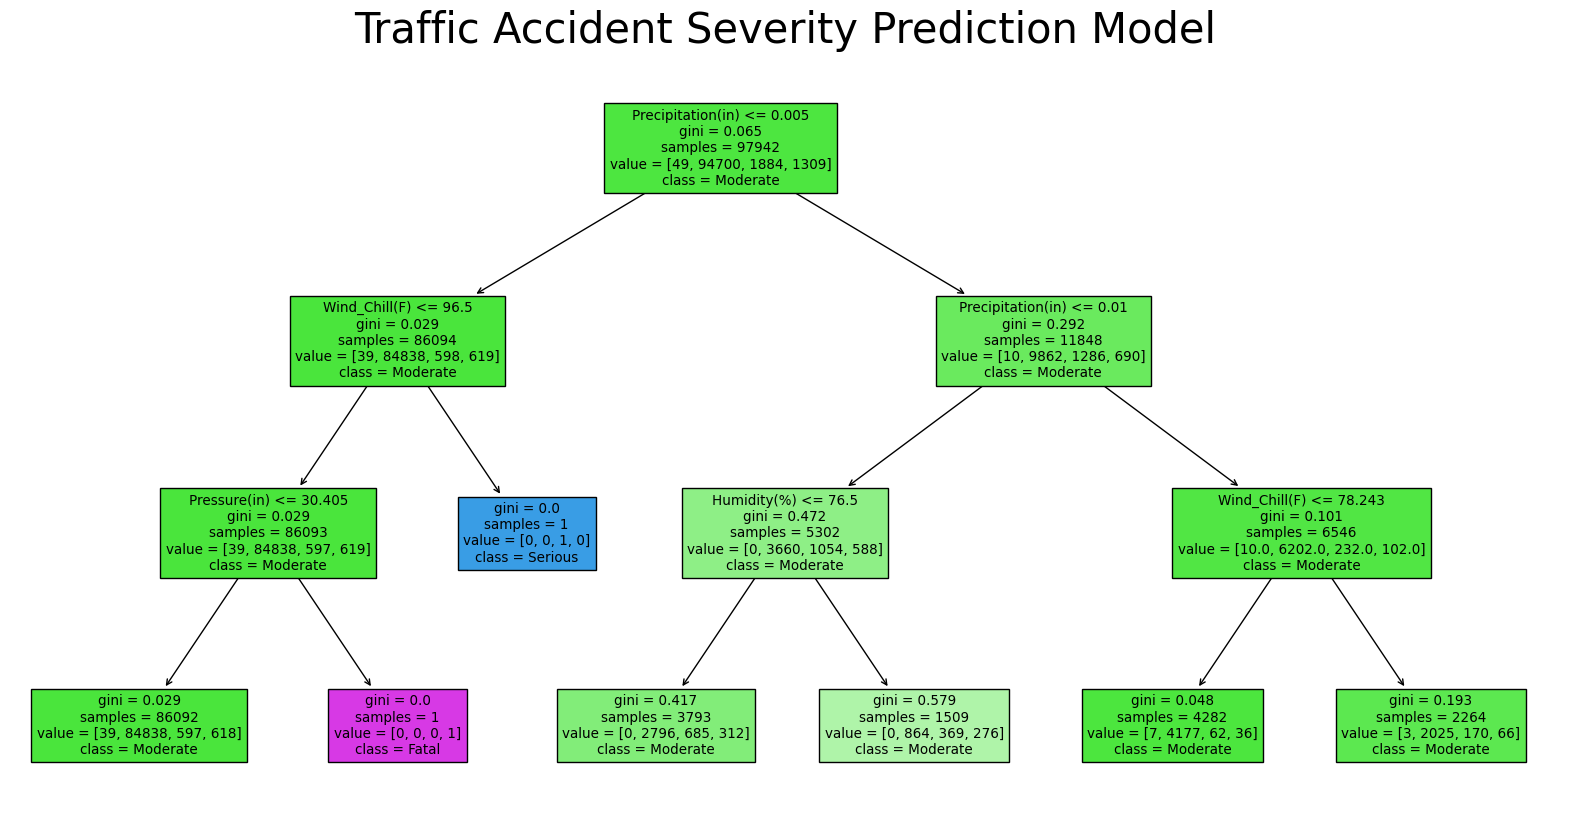

In [9]:
plt.figure(figsize=(20,10))  # Adjust the figure size as needed

plot_tree(clf, feature_names=X.columns, class_names=['Minor', 'Moderate', 'Serious', 'Fatal'], filled=True)
plt.title("Traffic Accident Severity Prediction Model", fontsize=30)

# Saving the decision tree into a file
plt.savefig('Data/decision_tree.png')

plt.show()